In [2]:
import pandas as pd
from scipy.stats import ttest_rel
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def calculate_consistency(modelname):
    deltas = pd.read_csv(f"deltas_{modelname}.csv", quoting=3, encoding='utf-8')
    deltas.rename(columns={"Unnamed: 0": "id"}, inplace=True)
    
    # all differences are anti-sterotyped - pro-stereotyped, as we expect anti-stereotyped to have higher surprisal/ reading time
    # a positive diff means anti-s. > pro-s., negative means anti-s. < pro-s.
    deltas["surp_consistency"] = deltas["surprisal_diff"].apply(lambda x: 1 if x >= 0 else 0)
    deltas["rt_consistency"] = deltas["rt_diff"].apply(lambda x: 1 if x >= 0 else 0)
    return deltas

In [4]:
deltas_bert = calculate_consistency("bert")
deltas_gpt2 = calculate_consistency("gpt2")
deltas_flan = calculate_consistency("flan")

In [5]:
deltas_gpt2["rt_prediction"] = deltas_gpt2["surprisal_diff"].apply(lambda x: 12 * x)

## Significance testing: consistency scores

In [6]:
print(ttest_rel(deltas_bert["surp_consistency"], deltas_bert["rt_consistency"]))
# BERT: consistency not significantly different from human consistency mean
# weak positive correlation is not significant

correlation, p_value = pearsonr(deltas_bert["surp_consistency"], deltas_bert["rt_consistency"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

TtestResult(statistic=0.22924949725561386, pvalue=0.8187467865044472, df=653)
Pearson correlation coefficient: 0.07034165431535723
p-value: 0.0722304487779235


In [7]:
print(ttest_rel(deltas_gpt2["surp_consistency"], deltas_gpt2["rt_consistency"]))
# GPT2: consistency significantly different from human consistency
# weak positive correlation is significant

correlation, p_value = pearsonr(deltas_gpt2["surp_consistency"], deltas_gpt2["rt_consistency"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

TtestResult(statistic=3.493652455044079, pvalue=0.000508646502190746, df=653)
Pearson correlation coefficient: 0.08399484847393594
p-value: 0.031735759996164355


In [8]:
print(ttest_rel(deltas_flan["surp_consistency"], deltas_flan["rt_consistency"]))
# FLAN: consistency not significantly different from human consistency
# weak positive correlation, but not significant

correlation, p_value = pearsonr(deltas_flan["surp_consistency"], deltas_flan["rt_consistency"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

TtestResult(statistic=0.05666156812622382, pvalue=0.954832121726026, df=653)
Pearson correlation coefficient: 0.04892989240527283
p-value: 0.21142388162838593


<Figure size 500x1200 with 0 Axes>

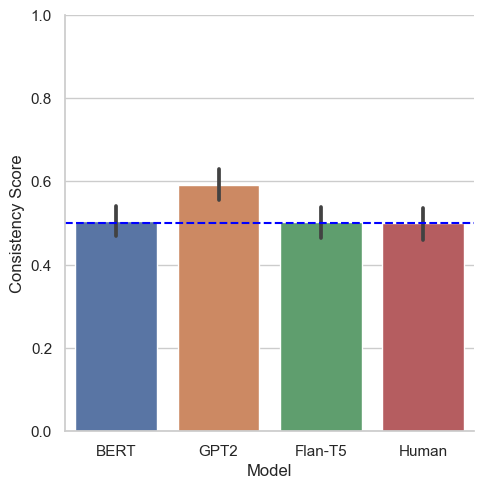

In [9]:
consistency_data = {
    'Consistency Score': deltas_bert["surp_consistency"].tolist() + deltas_gpt2["surp_consistency"].tolist() + deltas_flan["surp_consistency"].tolist() + deltas_bert["rt_consistency"].tolist(),
    'Model': ['BERT'] * len(deltas_bert) + ['GPT2'] * len(deltas_gpt2) + ["Flan-T5"] * len(deltas_flan) + ["Human"] * len(deltas_bert)
}

consistency_df = pd.DataFrame(consistency_data)

plt.figure(figsize=(5, 12))
sns.set(style="whitegrid")
ax = sns.catplot(x='Model', y='Consistency Score', kind='bar', data=consistency_df)

# Set y-axis limit
ax.set(ylim=(0, 1))
# Add vertical line at y = 0.5
for axes in ax.axes.flat:
    axes.axhline(y=0.5, color='blue', linestyle='--')

plt.show()

## Surprisal vs Reading time differences

In [10]:
# weak positive correlation is not significant

correlation, p_value = pearsonr(deltas_bert["surprisal_diff"], deltas_bert["rt_diff"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

Pearson correlation coefficient: 0.017779526047817358
p-value: 0.6499372112665155


In [11]:
# weak positive correlation is not significant

correlation, p_value = pearsonr(deltas_gpt2["surprisal_diff"], deltas_gpt2["rt_diff"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

Pearson correlation coefficient: 0.06520154674764633
p-value: 0.09571140734053378


In [12]:
# weak positive correlation is not significant

correlation, p_value = pearsonr(deltas_flan["surprisal_diff"], deltas_flan["rt_diff"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

Pearson correlation coefficient: 0.02052103626070983
p-value: 0.6003867758179278


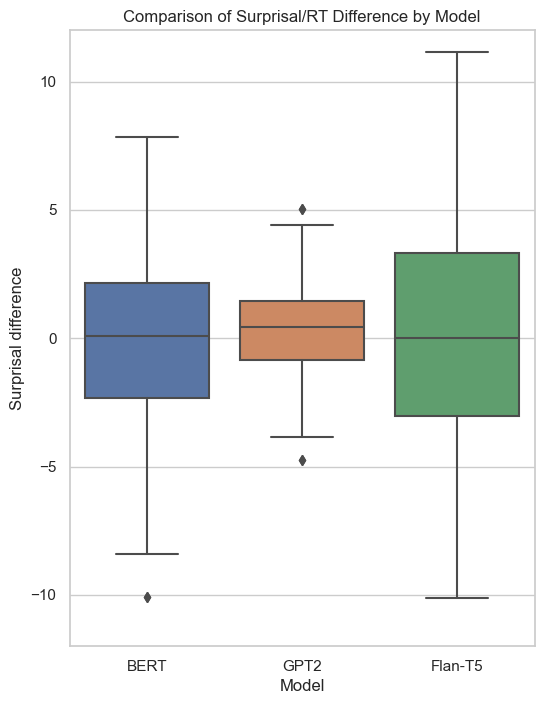

In [15]:
deltas_data = {
    'Surprisal difference': deltas_bert["surprisal_diff"].tolist() + deltas_gpt2["surprisal_diff"].tolist() + deltas_flan["surprisal_diff"].tolist(),
    'Model': ['BERT'] * len(deltas_bert) + ['GPT2'] * len(deltas_gpt2) + ["Flan-T5"] * len(deltas_flan)
}

deltas_df = pd.DataFrame(deltas_data)

plt.figure(figsize=(6, 8))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Model', y='Surprisal difference', data=deltas_df)
ax.set_title('Comparison of Surprisal Difference by Model')

# Set y-axis limit
ax.set(ylim=(-12, 12))
plt.show()
